# 시계열 수치입력 수치 예측 모델(다층 퍼셉트론)
- 시계열 수치를 입력해서 다음 수치를 예측하는 모델
- 각 모델에 코사인(cosine) 데이터를 학습시킨 후, 처음 일부 데이터를 알려주면 이후 코사인 형태의 데이터 예측을 얼마나 잘 하는 지 테스트

### 코사인 데이터를 만들기 
- 시간의 흐름에 따라 진폭이 -1.0에서 1.0사이로 변하는 1,600개의 실수값을 생성

### 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### 데이터셋 만들기 
- 생성한 코사인 데이터를 모델에 학습시키기 위해서는 데이터와 라벨로 구성된 데이터셋으로 만들기 
- 이전 수치들을 입력하여 다음 수치를 예측하는 문제
    - 데이터는 이전 수치
    - 라벨은 다음 수치
- 다른 예제들과는 달리 데이터와 라벨이 모두 같은 속성
- create_dataset() 함수는 시계열 수치를 입력받아 데이터셋을 생성
    - look_back 인자는 얼마만큼의 이전 수치를 데이터로 만들것인가를 결정

In [2]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
look_back = 40

### 1 데이터 셋 생성하기 

In [4]:
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

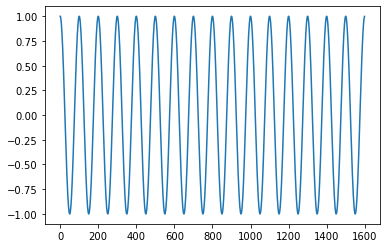

In [5]:
%matplotlib inline

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

#### 데이터 전처리

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

#### 데이터 분리

In [7]:
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

#### 데이터셋 생성

In [8]:
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

#### 데이터셋 전처리

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

* np.squeeze(배열, 차원) : 배열에서 1차원인 축을 제거  (1, 3, 1) -> (3, 1)
* np.squeeze(배열) : 배열에서 축을 전부 제거 (1, 3, 1) --> (3,)

In [10]:
x_train = np.squeeze(x_train) 
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

### 2 모델 구성하기 
- LSTM 
    - Long-Short Term Memory unit의 약자로 순환 신경망 레이어 중 하나
- tanh
    - LSTM의 출력 활성화 함수로 사용

In [11]:
model = Sequential()
model.add(Dense(32, input_dim=40, activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

### 3. 모델 학습과정 설정하기

In [12]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

### 4. 모델 학습시키기

In [13]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 7ms/step - loss: 0.6021 - val_loss: 0.3967
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4585 - val_loss: 0.3295
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3994 - val_loss: 0.2754
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.3874 - val_loss: 0.2296
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2947 - val_loss: 0.1958
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.2700 - val_loss: 0.1671
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2608 - val_loss: 0.1450
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2187 - val_loss: 0.1272
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.2229 - val_loss: 0.1126
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.1959 - val_loss: 0.1007
Epoch 11/

Epoch 83/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0750 - val_loss: 0.0278
Epoch 84/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0677 - val_loss: 0.0270
Epoch 85/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0724 - val_loss: 0.0261
Epoch 86/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0742 - val_loss: 0.0269
Epoch 87/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0668 - val_loss: 0.0271
Epoch 88/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0692 - val_loss: 0.0266
Epoch 89/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0730 - val_loss: 0.0259
Epoch 90/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0681 - val_loss: 0.0259
Epoch 91/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0690 - val_loss: 0.0256
Epoch 92/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0653 - val_loss: 0.0254


24/24 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0236
Epoch 165/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0505 - val_loss: 0.0230
Epoch 166/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0508 - val_loss: 0.0226
Epoch 167/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0225
Epoch 168/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0597 - val_loss: 0.0227
Epoch 169/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0564 - val_loss: 0.0228
Epoch 170/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0231
Epoch 171/200
24/24 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0230
Epoch 172/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0234
Epoch 173/200
24/24 [==============================] - 0s 3ms/step - loss: 0.0563 - val_loss: 0.0240
Epoc

### 5. 학습과정 살펴보기

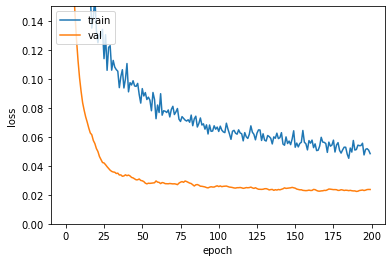

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()          

### 6. 모델 평가하기

In [15]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.0241384357213974
Validataion Score:  0.023662211373448372
Test Score:  0.023662211373448372


### 7. 모델 사용하기

In [16]:
look_ahead = 250
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])    

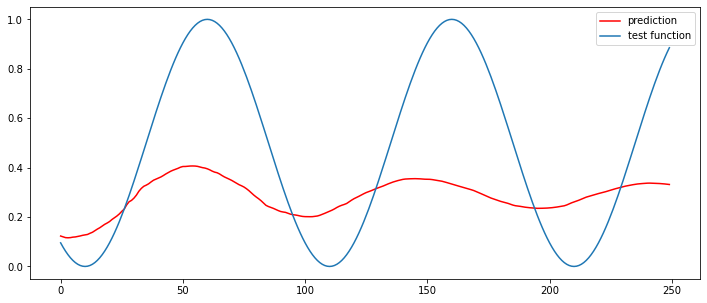

In [17]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()